In [1]:
import crepe
from scipy.io import wavfile
import numpy as np
import sounddevice as sd
import soundfile as sf
import matplotlib.pyplot as plt


In [2]:
filename = "violin.wav"



data, fs = sf.read(filename, dtype='float32')
time, frequency, confidence, activation = crepe.predict(data, fs, viterbi=True, center = True)

196/196 [==============================] - 139s 707ms/step


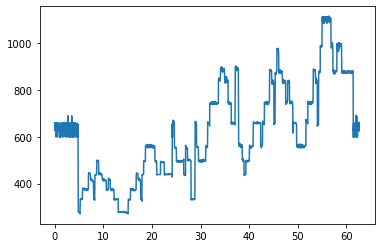

In [3]:
plt.plot(time, frequency)
plt.show()

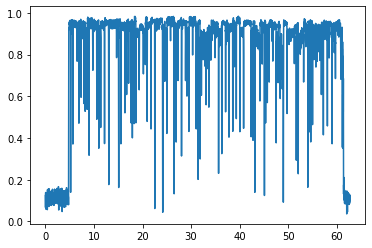

In [4]:
plt.plot(time, confidence)
plt.show()

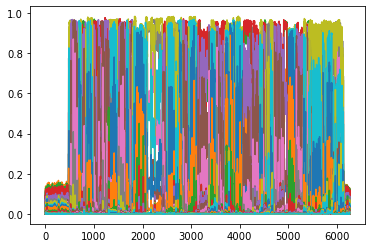

In [5]:
plt.plot(activation)
plt.show()

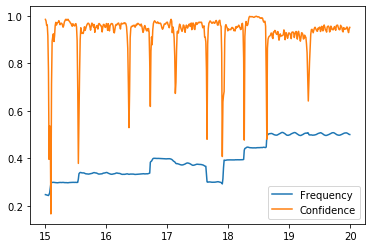

In [6]:
plt.plot(time[1500:2000], frequency[1500:2000]/np.max(frequency), label = "Frequency")
plt.plot(time[1500:2000], confidence[1500:2000]/np.max(confidence), label = "Confidence")
plt.legend()
plt.show()

In [7]:
print(np.max(confidence))

0.9841246


In [8]:
print(np.zeros((1)))

[0.]


In [9]:
conf_delay = np.concatenate((np.zeros((1)), confidence))
confidence_pad = np.concatenate((confidence, np.zeros((1))))

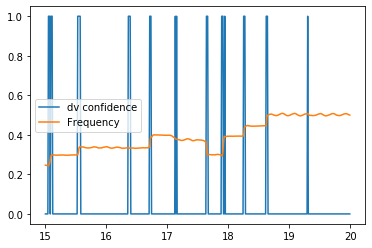

In [10]:
dv = confidence_pad - conf_delay
threshold = 0.10


dv_th = np.abs(dv) > threshold 

plt.plot(time[1500:2000],dv_th[1500:2000], label = "dv confidence")
#plt.plot(time[1500:2000],confidence[1500:2000], label = "confidence")
plt.plot(time[1500:2000], frequency[1500:2000]/np.max(frequency), label = "Frequency")
plt.legend()
plt.show()

In [11]:
print(confidence.shape)
print(dv[:-1].shape)

(6267,)
(6267,)


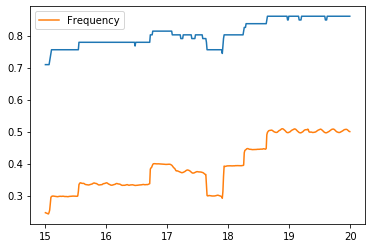

In [12]:
pitch = 69 + np.ceil(12*np.log2(frequency/440))

plt.plot(time[1500:2000], pitch[1500:2000]/np.max(pitch))
plt.plot(time[1500:2000], frequency[1500:2000]/np.max(frequency), label = "Frequency")
plt.legend()
plt.show()

No handles with labels found to put in legend.


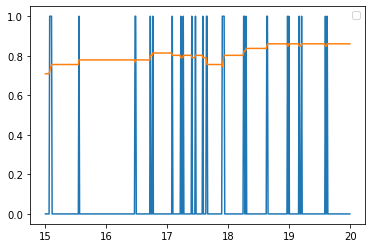

In [13]:
pitch_delay = np.concatenate((np.zeros((1)), pitch))
pitch_pad = np.concatenate((pitch, np.zeros((1))))

dp = np.abs(pitch_pad - pitch_delay) > 0

plt.plot(time[1500:2000], dp[1500:2000])
plt.plot(time[1500:2000], pitch[1500:2000]/np.max(pitch))

#plt.plot(time[1500:2000], frequency[1500:2000]/np.max(frequency), label = "Frequency")
plt.legend()
plt.show()

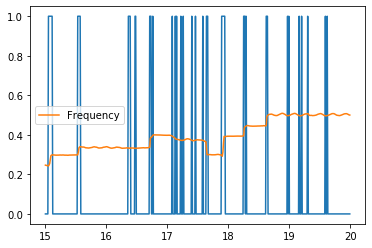

In [14]:

df1 = np.logical_or(dv_th, dp)
df2 = np.logical_or(dv_th, dp)


plt.plot(time[1500:2000], df1[1500:2000])
#plt.plot(time[1500:2000], df2[1500:2000])
#plt.plot(time[1500:2000], pitch[1500:2000]/np.max(pitch))

plt.plot(time[1500:2000], frequency[1500:2000]/np.max(frequency), label = "Frequency")
plt.legend()
plt.show()

In [15]:
from descriptors import*

/home/erik/.local/lib/python3.8/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/erik/.local/lib/python3.8/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


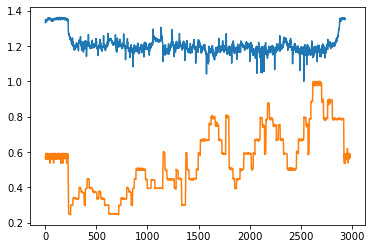

In [28]:
plt.plot(loudness/np.max(loudness))
plt.plot(pitch/np.max(pitch))
plt.show()